In [113]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [114]:
weather=pd.read_csv("C:\datasets\\weather_pred.csv")
weather.head()

,date,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
0,2015-01-04,-14,-12,-18,-4.0,-6.0,-6.0,-11.0,-9.0,-12.0,...,-18.0,1025.0,1026.0,1025.0,1010.0,1017.0,1019.0,0.76,0.00,0.00
1,2015-01-05,-9,-3,-14,-14.0,-4.0,-6.0,-19.0,-11.0,-9.0,...,-13.0,1043.0,1025.0,1026.0,1023.0,1010.0,1017.0,0.25,0.76,0.00
2,2015-01-06,-10,-6,-14,-9.0,-14.0,-4.0,-14.0,-19.0,-11.0,...,-16.0,1043.0,1043.0,1025.0,1023.0,1023.0,1010.0,0.00,0.25,0.76
3,2015-01-07,-16,-12,-19,-10.0,-9.0,-14.0,-15.0,-14.0,-19.0,...,-23.0,1043.0,1043.0,1043.0,1027.0,1023.0,1023.0,0.00,0.00,0.25
4,2015-01-08,-7,2,-16,-16.0,-10.0,-9.0,-22.0,-15.0,-14.0,...,-17.0,1055.0,1043.0,1043.0,956.0,1027.0,1023.0,0.00,0.00,0.00


In [115]:
weather.isnull().sum()

date               0
meantempm          0
maxtempm           0
mintempm           0
meantempm_1        0
meantempm_2        0
meantempm_3        0
meandewptm_1       0
meandewptm_2       0
meandewptm_3       0
meanpressurem_1    0
meanpressurem_2    0
meanpressurem_3    0
maxhumidity_1      0
maxhumidity_2      0
maxhumidity_3      0
minhumidity_1      0
minhumidity_2      0
minhumidity_3      0
maxtempm_1         0
maxtempm_2         0
maxtempm_3         0
mintempm_1         0
mintempm_2         0
mintempm_3         0
maxdewptm_1        0
maxdewptm_2        0
maxdewptm_3        0
mindewptm_1        0
mindewptm_2        0
mindewptm_3        0
maxpressurem_1     0
maxpressurem_2     0
maxpressurem_3     0
minpressurem_1     0
minpressurem_2     0
minpressurem_3     0
precipm_1          0
precipm_2          0
precipm_3          0
dtype: int64

In [116]:
day=[]
month=[]
year=[]
for i in range(997):
    day.append(weather['date'][i].split("-")[0])
    month.append(weather['date'][i].split("-")[1])
    year.append(weather['date'][i].split("-")[2])

In [117]:
d_m_y=pd.concat([pd.DataFrame(day),pd.DataFrame(month),pd.DataFrame(year)],axis=1)
weather=pd.concat([weather,d_m_y],axis=1)

In [118]:
weather.head()

,date,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,...,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3,0,0,0
0,2015-01-04,-14,-12,-18,-4.0,-6.0,-6.0,-11.0,-9.0,-12.0,...,1025.0,1010.0,1017.0,1019.0,0.76,0.00,0.00,2015,01,04
1,2015-01-05,-9,-3,-14,-14.0,-4.0,-6.0,-19.0,-11.0,-9.0,...,1026.0,1023.0,1010.0,1017.0,0.25,0.76,0.00,2015,01,05
2,2015-01-06,-10,-6,-14,-9.0,-14.0,-4.0,-14.0,-19.0,-11.0,...,1025.0,1023.0,1023.0,1010.0,0.00,0.25,0.76,2015,01,06
3,2015-01-07,-16,-12,-19,-10.0,-9.0,-14.0,-15.0,-14.0,-19.0,...,1043.0,1027.0,1023.0,1023.0,0.00,0.00,0.25,2015,01,07
4,2015-01-08,-7,2,-16,-16.0,-10.0,-9.0,-22.0,-15.0,-14.0,...,1043.0,956.0,1027.0,1023.0,0.00,0.00,0.00,2015,01,08


In [119]:
weather.columns

Index([           'date',       'meantempm',        'maxtempm',
              'mintempm',     'meantempm_1',     'meantempm_2',
           'meantempm_3',    'meandewptm_1',    'meandewptm_2',
          'meandewptm_3', 'meanpressurem_1', 'meanpressurem_2',
       'meanpressurem_3',   'maxhumidity_1',   'maxhumidity_2',
         'maxhumidity_3',   'minhumidity_1',   'minhumidity_2',
         'minhumidity_3',      'maxtempm_1',      'maxtempm_2',
            'maxtempm_3',      'mintempm_1',      'mintempm_2',
            'mintempm_3',     'maxdewptm_1',     'maxdewptm_2',
           'maxdewptm_3',     'mindewptm_1',     'mindewptm_2',
           'mindewptm_3',  'maxpressurem_1',  'maxpressurem_2',
        'maxpressurem_3',  'minpressurem_1',  'minpressurem_2',
        'minpressurem_3',       'precipm_1',       'precipm_2',
             'precipm_3',                 0,                 0,
                       0],
      dtype='object')

In [120]:
weather=weather.drop(['date','meantempm_1','meandewptm_1','meanpressurem_1','maxhumidity_1','minhumidity_1','maxtempm_1','mintempm_1','maxdewptm_1','mindewptm_1','maxpressurem_1','minpressurem_1','precipm_1'],axis=1)

In [121]:
weather.head()

,meantempm,maxtempm,mintempm,meantempm_2,meantempm_3,meandewptm_2,meandewptm_3,meanpressurem_2,meanpressurem_3,maxhumidity_2,...,mindewptm_3,maxpressurem_2,maxpressurem_3,minpressurem_2,minpressurem_3,precipm_2,precipm_3,0,0,0
0,-14,-12,-18,-6.0,-6.0,-9.0,-12.0,1022.0,1023.0,92.0,...,-18.0,1026.0,1025.0,1017.0,1019.0,0.00,0.00,2015,01,04
1,-9,-3,-14,-4.0,-6.0,-11.0,-9.0,1016.0,1022.0,92.0,...,-13.0,1025.0,1026.0,1010.0,1017.0,0.76,0.00,2015,01,05
2,-10,-6,-14,-14.0,-4.0,-19.0,-11.0,1033.0,1016.0,80.0,...,-16.0,1043.0,1025.0,1023.0,1010.0,0.25,0.76,2015,01,06
3,-16,-12,-19,-9.0,-14.0,-14.0,-19.0,1032.0,1033.0,80.0,...,-23.0,1043.0,1043.0,1023.0,1023.0,0.00,0.25,2015,01,07
4,-7,2,-16,-10.0,-9.0,-15.0,-14.0,1036.0,1032.0,80.0,...,-17.0,1043.0,1043.0,1027.0,1023.0,0.00,0.00,2015,01,08


In [122]:
weather.columns

Index([      'meantempm',        'maxtempm',        'mintempm',
           'meantempm_2',     'meantempm_3',    'meandewptm_2',
          'meandewptm_3', 'meanpressurem_2', 'meanpressurem_3',
         'maxhumidity_2',   'maxhumidity_3',   'minhumidity_2',
         'minhumidity_3',      'maxtempm_2',      'maxtempm_3',
            'mintempm_2',      'mintempm_3',     'maxdewptm_2',
           'maxdewptm_3',     'mindewptm_2',     'mindewptm_3',
        'maxpressurem_2',  'maxpressurem_3',  'minpressurem_2',
        'minpressurem_3',       'precipm_2',       'precipm_3',
                       0,                 0,                 0],
      dtype='object')

In [123]:
weather['meantempm_avg']=(weather['meantempm_2']+weather['meantempm_3'])/2
weather['meandewptm_avg']=(weather['meandewptm_2']+weather['meandewptm_3'])/2
weather['meanpressurem_avg']=(weather['meanpressurem_2']+weather['meanpressurem_3'])/2
weather['maxhumidity_avg']=(weather['maxhumidity_2']+weather['maxhumidity_3'])/2
weather['minhumidity_avg']=(weather['minhumidity_2']+weather['minhumidity_3'])/2
weather['maxtempm_avg']=(weather['maxtempm_2']+weather['maxtempm_3'])/2
weather['mintempm_avg']=(weather['mintempm_2']+weather['mintempm_3'])/2
weather['maxdewptm_avg']=(weather['maxdewptm_2']+weather['maxdewptm_3'])/2
weather['mindewptm_avg']=(weather['mindewptm_2']+weather['mindewptm_3'])/2
weather['maxpressurem_avg']=(weather['maxpressurem_2']+weather['maxpressurem_3'])/2
weather['minpressurem_avg']=(weather['minpressurem_2']+weather['minpressurem_3'])/2
weather['precipm_avg']=(weather['precipm_2']+weather['precipm_2'])/2

weather.head()

,meantempm,maxtempm,mintempm,meantempm_2,meantempm_3,meandewptm_2,meandewptm_3,meanpressurem_2,meanpressurem_3,maxhumidity_2,...,meanpressurem_avg,maxhumidity_avg,minhumidity_avg,maxtempm_avg,mintempm_avg,maxdewptm_avg,mindewptm_avg,maxpressurem_avg,minpressurem_avg,precipm_avg
0,-14,-12,-18,-6.0,-6.0,-9.0,-12.0,1022.0,1023.0,92.0,...,1022.5,88.0,55.0,1.5,-12.5,-6.0,-15.5,1025.5,1018.0,0.00
1,-9,-3,-14,-4.0,-6.0,-11.0,-9.0,1016.0,1022.0,92.0,...,1019.0,92.0,57.5,2.0,-12.5,-5.0,-14.5,1025.5,1013.5,0.76
2,-10,-6,-14,-14.0,-4.0,-19.0,-11.0,1033.0,1016.0,80.0,...,1024.5,86.0,52.5,-4.5,-15.5,-10.0,-19.5,1034.0,1016.5,0.25
3,-16,-12,-19,-9.0,-14.0,-14.0,-19.0,1032.0,1033.0,80.0,...,1032.5,80.0,49.5,-7.5,-16.0,-12.0,-20.0,1043.0,1023.0,0.00
4,-7,2,-16,-10.0,-9.0,-15.0,-14.0,1036.0,1032.0,80.0,...,1034.0,80.0,53.5,-4.5,-14.0,-10.0,-17.5,1043.0,1025.0,0.00


In [124]:
weather.columns

Index([        'meantempm',          'maxtempm',          'mintempm',
             'meantempm_2',       'meantempm_3',      'meandewptm_2',
            'meandewptm_3',   'meanpressurem_2',   'meanpressurem_3',
           'maxhumidity_2',     'maxhumidity_3',     'minhumidity_2',
           'minhumidity_3',        'maxtempm_2',        'maxtempm_3',
              'mintempm_2',        'mintempm_3',       'maxdewptm_2',
             'maxdewptm_3',       'mindewptm_2',       'mindewptm_3',
          'maxpressurem_2',    'maxpressurem_3',    'minpressurem_2',
          'minpressurem_3',         'precipm_2',         'precipm_3',
                         0,                   0,                   0,
           'meantempm_avg',    'meandewptm_avg', 'meanpressurem_avg',
         'maxhumidity_avg',   'minhumidity_avg',      'maxtempm_avg',
            'mintempm_avg',     'maxdewptm_avg',     'mindewptm_avg',
        'maxpressurem_avg',  'minpressurem_avg',       'precipm_avg'],
      dtype='object

In [125]:
weather=weather.drop(['meantempm_2','meantempm_3','meandewptm_2','meandewptm_3','meanpressurem_2','meanpressurem_3','maxhumidity_2','maxhumidity_3','minhumidity_2','minhumidity_3','maxtempm_2','maxtempm_3','mintempm_2','mintempm_3','maxdewptm_2','maxdewptm_3','mindewptm_2','mindewptm_3','maxpressurem_2','maxpressurem_3','minpressurem_2','minpressurem_3','precipm_2','precipm_3'],axis=1)
weather

,meantempm,maxtempm,mintempm,0,0,0,meantempm_avg,meandewptm_avg,meanpressurem_avg,maxhumidity_avg,minhumidity_avg,maxtempm_avg,mintempm_avg,maxdewptm_avg,mindewptm_avg,maxpressurem_avg,minpressurem_avg,precipm_avg
0,-14,-12,-18,2015,01,04,-6.0,-10.5,1022.5,88.0,55.0,1.5,-12.5,-6.0,-15.5,1025.5,1018.0,0.00
1,-9,-3,-14,2015,01,05,-5.0,-10.0,1019.0,92.0,57.5,2.0,-12.5,-5.0,-14.5,1025.5,1013.5,0.76
2,-10,-6,-14,2015,01,06,-9.0,-15.0,1024.5,86.0,52.5,-4.5,-15.5,-10.0,-19.5,1034.0,1016.5,0.25
3,-16,-12,-19,2015,01,07,-11.5,-16.5,1032.5,80.0,49.5,-7.5,-16.0,-12.0,-20.0,1043.0,1023.0,0.00
4,-7,2,-16,2015,01,08,-9.5,-14.5,1034.0,80.0,53.5,-4.5,-14.0,-10.0,-17.5,1043.0,1025.0,0.00
5,-11,-7,-16,2015,01,09,-13.0,-18.5,1035.5,76.0,49.5,-9.0,-16.5,-15.0,-21.0,1049.0,991.5,0.00
6,-6,6,-17,2015,01,10,-11.5,-17.0,1029.5,70.5,50.0,-5.0,-17.5,-11.0,-22.5,1046.0,985.0,0.00
7,-5,3,-13,2015,01,11,-9.0,-15.5,1029.5,69.0,49.0,-2.5,-16.0,-8.5,-21.0,1038.0,1022.0,0.00
8,-13,-7,-19,2015,01,12,-8.5,-15.5,1029.0,74.0,43.0,-0.5,-16.5,-9.5,-20.0,1035.0,1024.5,0.00
9,-12,-4,-20,2015,01,13,-5.5,-11.5,1023.5,87.5,45.0,4.5,-15.0,-6.5,-16.5,1031.0,1020.0,0.00


#  Linear Regression

In [126]:
c=weather.corr()
c

,meantempm,maxtempm,mintempm,meantempm_avg,meandewptm_avg,meanpressurem_avg,maxhumidity_avg,minhumidity_avg,maxtempm_avg,mintempm_avg,maxdewptm_avg,mindewptm_avg,maxpressurem_avg,minpressurem_avg,precipm_avg
meantempm,1.000000,0.976328,0.973122,0.882235,0.857305,-0.295990,0.189494,-0.147741,0.870204,0.861773,0.854843,0.857669,-0.452527,-0.118244,0.084394
maxtempm,0.976328,1.000000,0.902804,0.841531,0.809427,-0.276621,0.165680,-0.189737,0.838000,0.813232,0.811070,0.806975,-0.421236,-0.112021,0.063871
mintempm,0.973122,0.902804,1.000000,0.880384,0.864184,-0.301017,0.202469,-0.096564,0.859233,0.870131,0.857897,0.867913,-0.462292,-0.118705,0.105728
meantempm_avg,0.882235,0.841531,0.880384,1.000000,0.964380,-0.507722,0.169591,-0.155834,0.982791,0.980760,0.965777,0.959369,-0.645031,-0.325484,0.150492
meandewptm_avg,0.857305,0.809427,0.864184,0.964380,1.000000,-0.523518,0.368103,0.084580,0.916376,0.979766,0.993174,0.992586,-0.654522,-0.341591,0.203556
meanpressurem_avg,-0.295990,-0.276621,-0.301017,-0.507722,-0.523518,1.000000,-0.169799,-0.089902,-0.484032,-0.512828,-0.533404,-0.499377,0.959829,0.929080,-0.208232
maxhumidity_avg,0.189494,0.165680,0.202469,0.169591,0.368103,-0.169799,1.000000,0.583195,0.108271,0.226038,0.345772,0.359806,-0.202375,-0.095478,0.182345
minhumidity_avg,-0.147741,-0.189737,-0.096564,-0.155834,0.084580,-0.089902,0.583195,1.000000,-0.292886,-0.006125,0.054366,0.088454,-0.052915,-0.101852,0.225581
maxtempm_avg,0.870204,0.838000,0.859233,0.982791,0.916376,-0.484032,0.108271,-0.292886,1.000000,0.929210,0.924603,0.906232,-0.618985,-0.306994,0.115690
mintempm_avg,0.861773,0.813232,0.870131,0.980760,0.979766,-0.512828,0.226038,-0.006125,0.929210,1.000000,0.973782,0.980366,-0.648078,-0.332439,0.180254


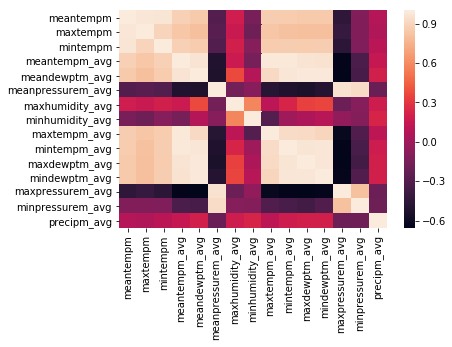

In [127]:
import seaborn as sns
sns.heatmap(c)

In [128]:
weather.head()

,meantempm,maxtempm,mintempm,0,0,0,meantempm_avg,meandewptm_avg,meanpressurem_avg,maxhumidity_avg,minhumidity_avg,maxtempm_avg,mintempm_avg,maxdewptm_avg,mindewptm_avg,maxpressurem_avg,minpressurem_avg,precipm_avg
0,-14,-12,-18,2015,01,04,-6.0,-10.5,1022.5,88.0,55.0,1.5,-12.5,-6.0,-15.5,1025.5,1018.0,0.00
1,-9,-3,-14,2015,01,05,-5.0,-10.0,1019.0,92.0,57.5,2.0,-12.5,-5.0,-14.5,1025.5,1013.5,0.76
2,-10,-6,-14,2015,01,06,-9.0,-15.0,1024.5,86.0,52.5,-4.5,-15.5,-10.0,-19.5,1034.0,1016.5,0.25
3,-16,-12,-19,2015,01,07,-11.5,-16.5,1032.5,80.0,49.5,-7.5,-16.0,-12.0,-20.0,1043.0,1023.0,0.00
4,-7,2,-16,2015,01,08,-9.5,-14.5,1034.0,80.0,53.5,-4.5,-14.0,-10.0,-17.5,1043.0,1025.0,0.00


In [129]:
import seaborn as sns

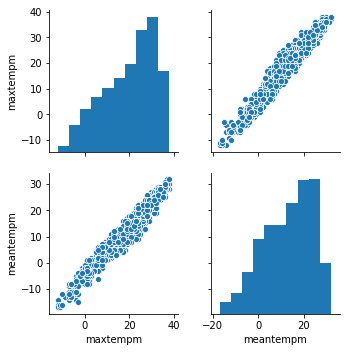

In [130]:
sns.pairplot(weather.iloc[:,[1,0]])

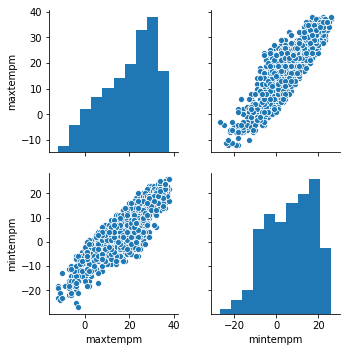

In [131]:
sns.pairplot(weather.iloc[:,[1,2]])

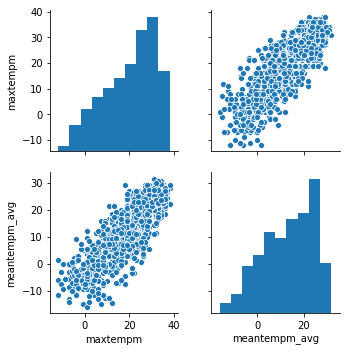

In [132]:
sns.pairplot(weather.iloc[:,[1,6]])

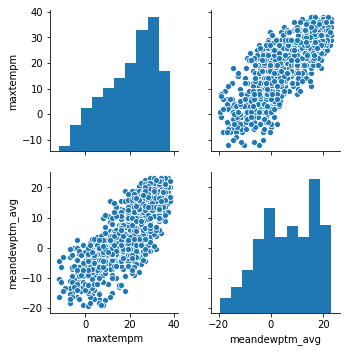

In [133]:
sns.pairplot(weather.iloc[:,[1,7]])

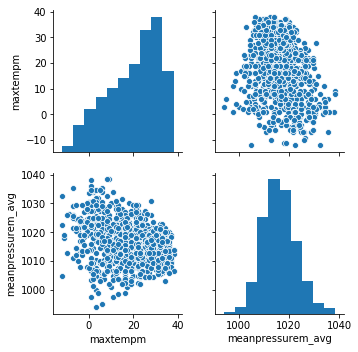

In [134]:
sns.pairplot(weather.iloc[:,[1,8]])

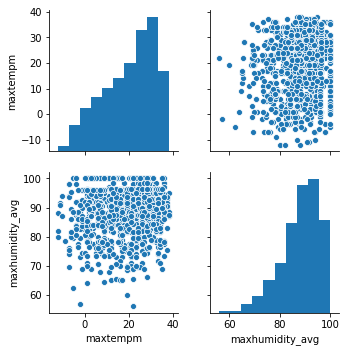

In [135]:
sns.pairplot(weather.iloc[:,[1,9]])

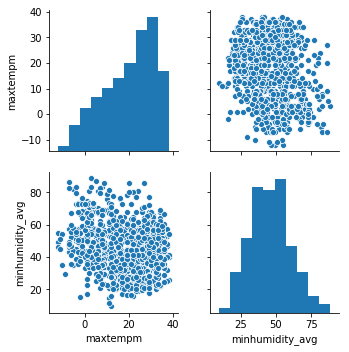

In [136]:
sns.pairplot(weather.iloc[:,[1,10]])

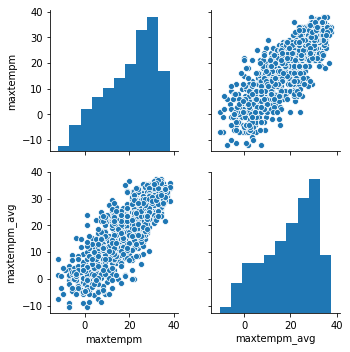

In [137]:
sns.pairplot(weather.iloc[:,[1,11]])

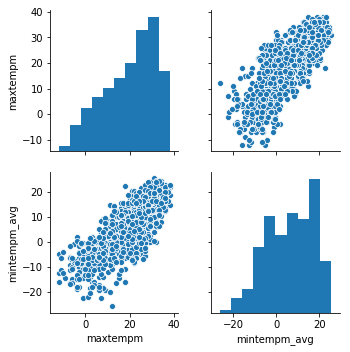

In [138]:
sns.pairplot(weather.iloc[:,[1,12]])

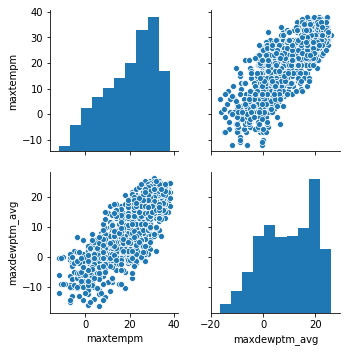

In [139]:
sns.pairplot(weather.iloc[:,[1,13]])

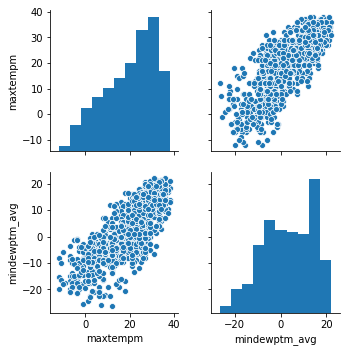

In [140]:
sns.pairplot(weather.iloc[:,[1,14]])

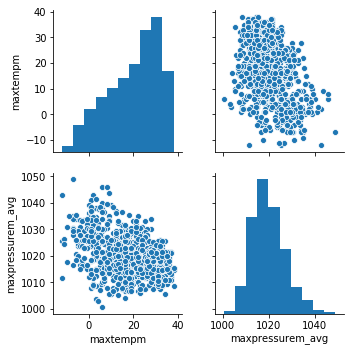

In [141]:
sns.pairplot(weather.iloc[:,[1,15]])

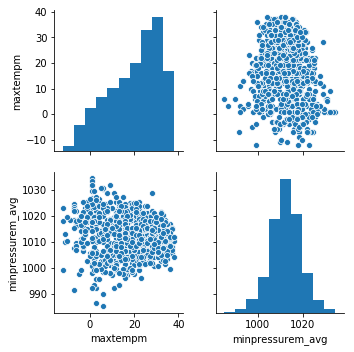

In [143]:
sns.pairplot(weather.iloc[:,[1,16]])

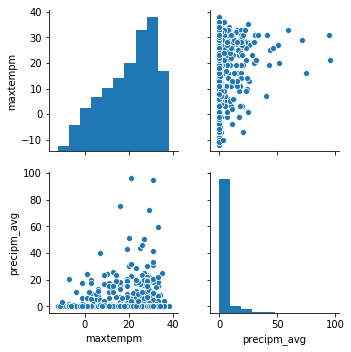

In [144]:
sns.pairplot(weather.iloc[:,[1,17]])

In [158]:
x=weather.iloc[:,:]
y=weather.iloc[:,1] #predicting maxtemperature


In [159]:
x=x.drop(['maxtempm','meantempm','meantempm_avg','meandewptm_avg','meanpressurem_avg','maxtempm_avg','mindewptm_avg','maxhumidity_avg'],axis=1)

In [160]:
x.head()

,mintempm,0,0,0,minhumidity_avg,mintempm_avg,maxdewptm_avg,maxpressurem_avg,minpressurem_avg,precipm_avg
0,-18,2015,01,04,55.0,-12.5,-6.0,1025.5,1018.0,0.00
1,-14,2015,01,05,57.5,-12.5,-5.0,1025.5,1013.5,0.76
2,-14,2015,01,06,52.5,-15.5,-10.0,1034.0,1016.5,0.25
3,-19,2015,01,07,49.5,-16.0,-12.0,1043.0,1023.0,0.00
4,-16,2015,01,08,53.5,-14.0,-10.0,1043.0,1025.0,0.00


In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=66,test_size=.10)

In [162]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [163]:
reg.coef_

array([ 0.73047066,  0.07706671, -0.02924048, -0.02603133, -0.11064928,
       -0.1644628 ,  0.49131822,  0.11124143, -0.00195716, -0.02759781])

In [164]:
reg.intercept_

-249.89802090171543

In [165]:
y_pred=reg.predict(x_test)

In [166]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.894188151952155

In [156]:
'''ts_score=[]
import numpy as np
for j in range (100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=j,test_size=.10)
    lr=LinearRegression().fit(x_train,y_train)
    ts_score.append(lr.score(x_test,y_test))
k=ts_score.index(np.max(ts_score))'''
    

In [157]:
#k

66

#  Decision Tree Regression

In [279]:
x=weather.iloc[:,:]
y=weather.iloc[:,1] #predicting maxtemperature


In [280]:
x=x.drop(['maxtempm','meantempm','meantempm_avg','meandewptm_avg','meanpressurem_avg','maxtempm_avg','mindewptm_avg','maxhumidity_avg'],axis=1)

In [281]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=66,test_size=.10)

In [282]:
from sklearn.tree import DecisionTreeRegressor
rt=DecisionTreeRegressor(min_samples_split=0.07).fit(x_train,y_train)
y_pred=rt.predict(x_test)

In [283]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8501174450015696

In [188]:
'''ts_score=[]
import numpy as np
for j in range (100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=j,test_size=.10)
    dt=DecisionTreeRegressor().fit(x_train,y_train)
    ts_score.append(lr.score(x_test,y_test))
k=ts_score.index(np.max(ts_score))'''

In [189]:
#k

66

# Random Forest Regression 

In [326]:
x=weather.iloc[:,:]
y=weather.iloc[:,1] #predicting maxtemperature


In [327]:
x=x.drop(['maxtempm','meantempm','meantempm_avg','meandewptm_avg','meanpressurem_avg','maxtempm_avg','mindewptm_avg','maxhumidity_avg'],axis=1)

In [328]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=66,test_size=.10)

In [329]:
from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor(n_estimators=82,random_state=66).fit(x_train,y_train)
y_pred=rr.predict(x_test)

In [330]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8782597992156659

In [331]:
'''ts_score=[]
import numpy as np
for j in range (100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=j,test_size=.10)
    rf=RandomForestRegressor(n_estimators=82,random_state=66).fit(x_train,y_train)
    ts_score.append(lr.score(x_test,y_test))
k=ts_score.index(np.max(ts_score))'''

In [332]:
#k

66

In [310]:
from sklearn.ensemble import RandomForestRegressor
#to find the k value(n_estimator)
error=[]
#calculating error for k values between 1 and 40
for i in range(3,100,2):
    rr=RandomForestRegressor(n_estimators=i)
    rr.fit(x_train,y_train)
    pred_y_test=rr.predict(x_test)
    error.append(np.mean(pred_y_test != y_test))

Text(0, 0.5, 'Mean Error')

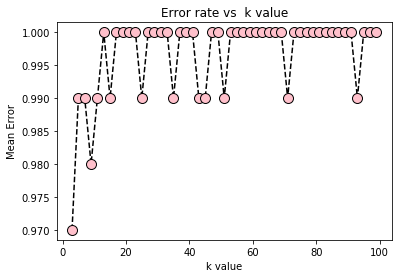

In [311]:
import matplotlib.pyplot as plt
plt.plot(range(3,100,2),error,color='black',linestyle='dashed',marker='o',markerfacecolor='pink',markersize=10)
plt.title('Error rate vs  k value')
plt.xlabel('k value')
plt.ylabel('Mean Error')